## Algerian Forest Fires Dataset

### Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria 
and the Sidi Bel-abbes region located in the northwest of Algeria.
    
122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been
classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date: (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp: temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH: Relative Humidity in %: 21 to 90
4. Ws:Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')


In [5]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


## Data cleaning

In [8]:
# missing values
dataset.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [9]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset in converted into two sets base on region from 122th index, we can make a new column based on the region

1. Bejaia Region Dataset
2. Sidi-Bel Abbes Region Dataset

Add new column with Region

In [11]:
#loc pandas ma ek data selection method chhe, je tame row ane column label na basis par data access/modify karva mate use karo chho.

#syntex:-
#dataset.loc[row_selection, column_selection]


# Row index 0 thi 5 sudhi, 'Region' column ni values melavva
#dataset.loc[0:5, "Region"]

# Row index 0 thi 5 sudhi, 'Region' column ne value 0 aapva
#dataset.loc[0:5, "Region"] = 0


In [12]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [15]:
df[['Region']]=df[['Region']].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.1+ KB


In [17]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [18]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [19]:
## Removing the null values
# Drop all rows containing NaN values, then reset index to start from 0 and drop the old index column
df = df.dropna().reset_index(drop=True)


In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [21]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [22]:
df.iloc[[122]]

## Amma su thayu new dataset chalu thato hato atle eni first row jema columns na name hata e 122 per aavi gai kem ke aapde 122 drop kari

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [23]:
df = df.drop(122).reset_index(drop=True)


In [24]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [25]:
## aana iper aapde su kam karyu mainly  null valaues vadi row delate kari and 
# 122 null hati to ene delate kari to ana pachi ne row ke jema new niche na dataset na
# clumns na name hata e 12 per aavii gai to aapde ene pan drop kari didhi and index reset karyu


In [26]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [27]:
## Fix spaces in columns name
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### *Changing the required columns as integer data type*

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [30]:
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


### *Changing Other columns to float data datatype*

In [33]:
objects=[feature for feature in df.columns if df[feature].dtypes=='O']

In [34]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [35]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [37]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [38]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [39]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [40]:
 # Let save the cleaned  dataset 
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

## EDA

In [42]:
df_copy=df.drop(['day','month','year'],axis=1)

In [43]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:
# categories  in classes
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [45]:
## Ama amuk  space na lidhe fire same hova chhata alag alag chhe and not fire ma pan same j chhe
## aane aapde sarkhu karva mate
# not fire ne 0 and fire ne 1 set kari daiye using numpy

df_copy['Classes']=np.where(df_copy['Classes'].str.contains("not fire"),0,1)

In [46]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [47]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [48]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

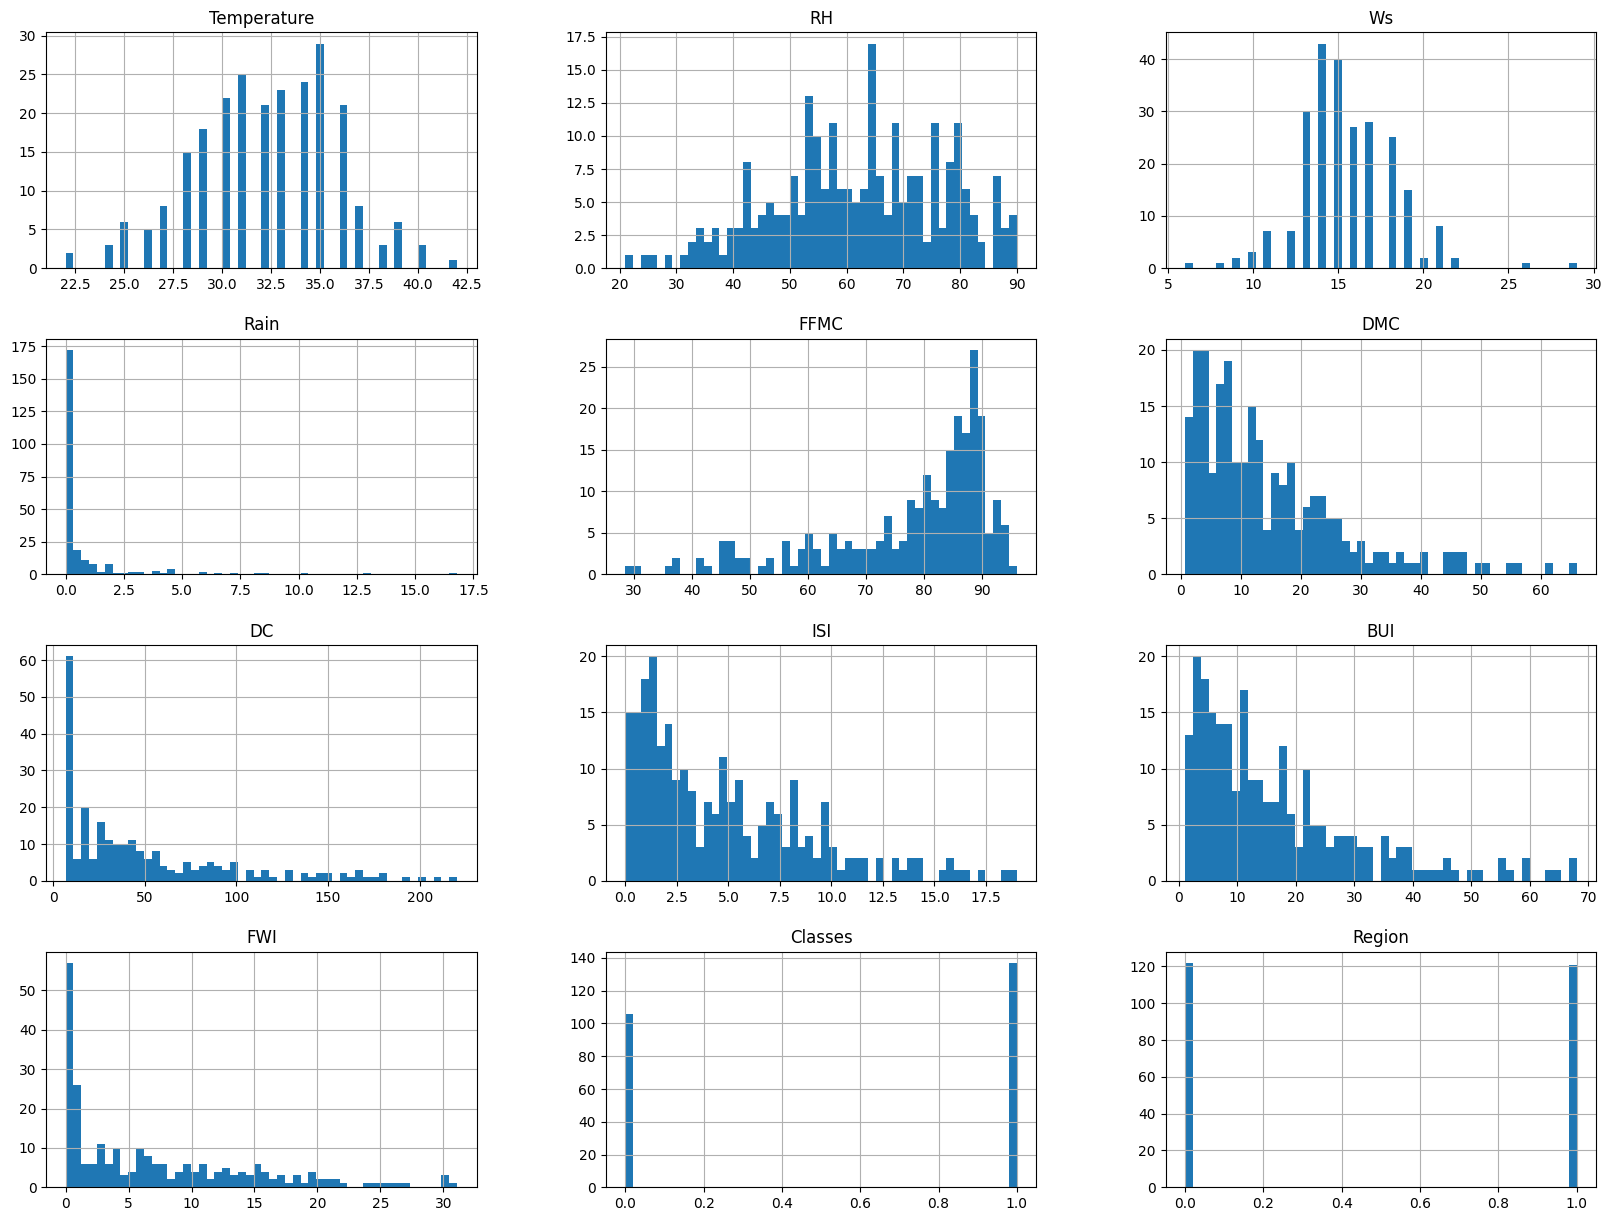

In [49]:
## plot density plot for all feature

# plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [50]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

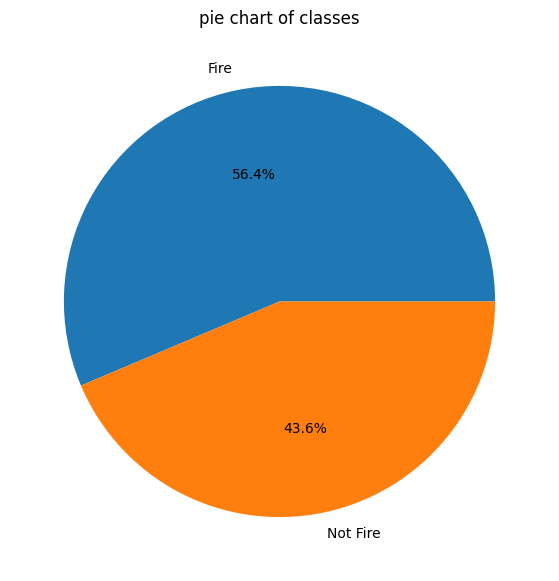

In [51]:
## Ploting Graph

classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('pie chart of classes')
plt.show()

### Corelation

In [53]:
df_copy.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

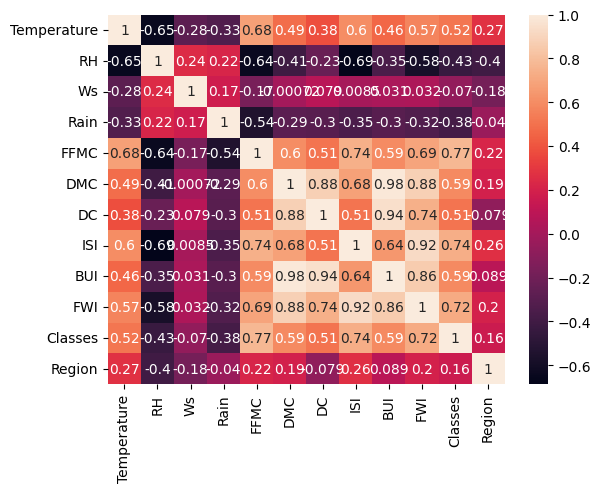

In [54]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

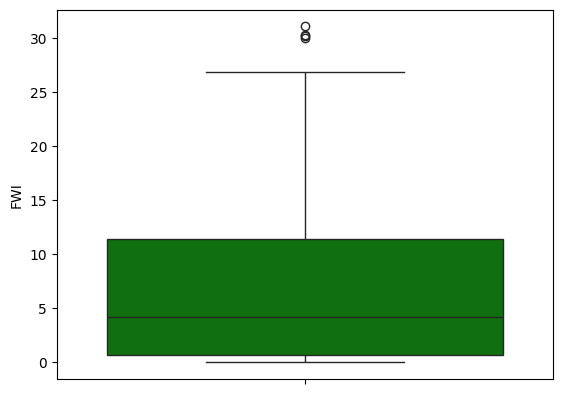

In [55]:
## Box Plots

sns.boxplot(df_copy['FWI'], color='green')



In [56]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [57]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')


Text(0.5, 1.0, 'Fire Analysis of Sidi Bel Regions')

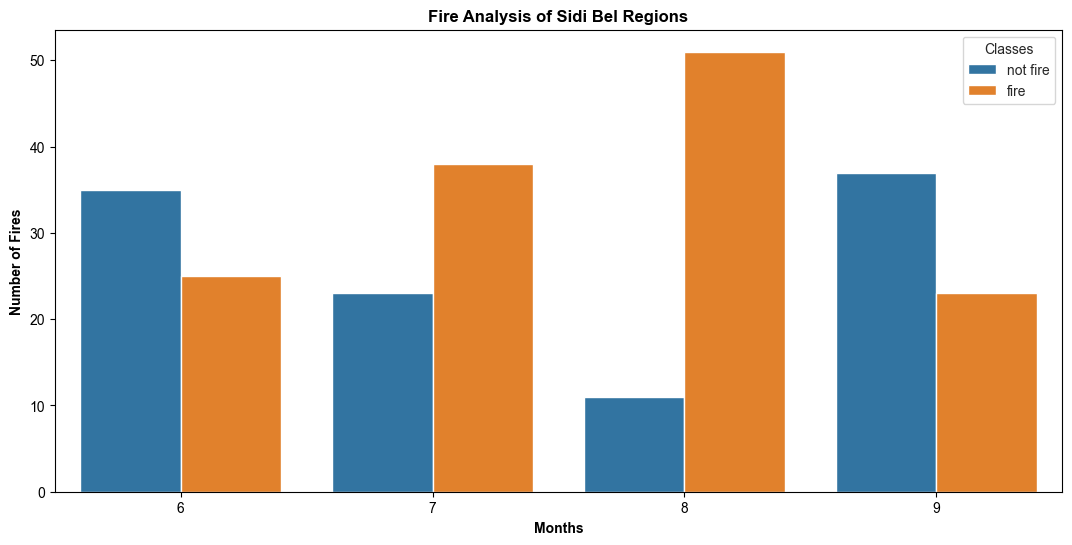

In [58]:
## Monthly Fire Analysis

dftemp=df.loc[df['Region']==1]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')

sns.countplot(x='month',hue='Classes',data=df)

plt.ylabel('Number of Fires',weight='bold')

plt.xlabel('Months',weight='bold')

plt.title("Fire Analysis of Sidi Bel Regions",weight='bold')

In [415]:
## Step 1 
## devide  data set into dependent and independent feature

x=df_copy[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','Classes','Region']]
y=df_copy.iloc[:,-3]

In [417]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [419]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [421]:
## Step 2: Furture devide into trian test

from sklearn.model_selection import train_test_split

In [423]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=41)

In [425]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((162, 11), (162,), (81, 11), (81,))

In [427]:
## step 3 :Standard scaling(scale down)
# from sklearn.preprocessing import StandardScaler
# scaler= StandardScaler()

In [429]:
# scaler

In [431]:
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.transform(x_test)

In [433]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
110,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,1,0
212,30,59,19,0.0,89.1,27.8,168.2,9.8,39.3,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
20,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,1,0
81,36,58,19,0.0,88.6,29.6,141.1,9.2,38.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...
80,35,68,19,0.0,88.3,25.9,130.6,8.8,34.7,1,0
226,28,81,15,0.0,84.6,12.6,41.5,4.3,14.3,1,1
140,32,67,14,4.5,64.6,4.4,8.2,1.0,4.2,0,1
163,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,1,1


In [435]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
42,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,0,0
55,36,53,19,0.0,89.2,17.1,98.6,10.0,23.9,1,0
153,33,48,16,0.0,87.6,7.9,17.8,6.8,7.8,1,1
156,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,1,1
123,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...
104,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0,0
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
236,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0,1
216,30,66,15,0.2,73.5,4.1,26.6,1.5,6.0,0,1


In [437]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657865,-0.301657,-0.332138,0.701348,0.503208,0.408613,0.639462,0.483535,0.584496,0.222049
RH,-0.657865,1.000000,0.261967,0.208189,-0.673816,-0.456503,-0.272701,-0.700621,-0.404756,-0.473400,-0.390660
Ws,-0.301657,0.261967,1.000000,0.129322,-0.197204,-0.020422,0.070561,-0.034900,0.014725,-0.151298,-0.205506
Rain,-0.332138,0.208189,0.129322,1.000000,-0.535442,-0.306489,-0.302147,-0.350055,-0.314603,-0.372828,-0.018347
FFMC,0.701348,-0.673816,-0.197204,-0.535442,1.000000,0.625581,0.526389,0.753440,0.615137,0.789954,0.213642
DMC,0.503208,-0.456503,-0.020422,-0.306489,0.625581,1.000000,0.882059,0.690784,0.982800,0.602433,0.173932
DC,0.408613,-0.272701,0.070561,-0.302147,0.526389,0.882059,1.000000,0.522379,0.943256,0.520841,-0.100300
ISI,0.639462,-0.700621,-0.034900,-0.350055,0.753440,0.690784,0.522379,1.000000,0.659108,0.747281,0.237569
BUI,0.483535,-0.404756,0.014725,-0.314603,0.615137,0.982800,0.943256,0.659108,1.000000,0.605531,0.068821
Classes,0.584496,-0.473400,-0.151298,-0.372828,0.789954,0.602433,0.520841,0.747281,0.605531,1.000000,0.134060


In [443]:
# x_train_df=pd.DataFrame(x_train,columns=['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'])

##### check  for multicolinearity
##### f1 f2 f3 Y
##### if f1 is highly corelated with f3 then why we  use f1 and f3 for pridiction of y
##### we can use only f2 f3 for Y 

##### Entire process known as feature selection

In [446]:
## For feature selection

<Axes: >

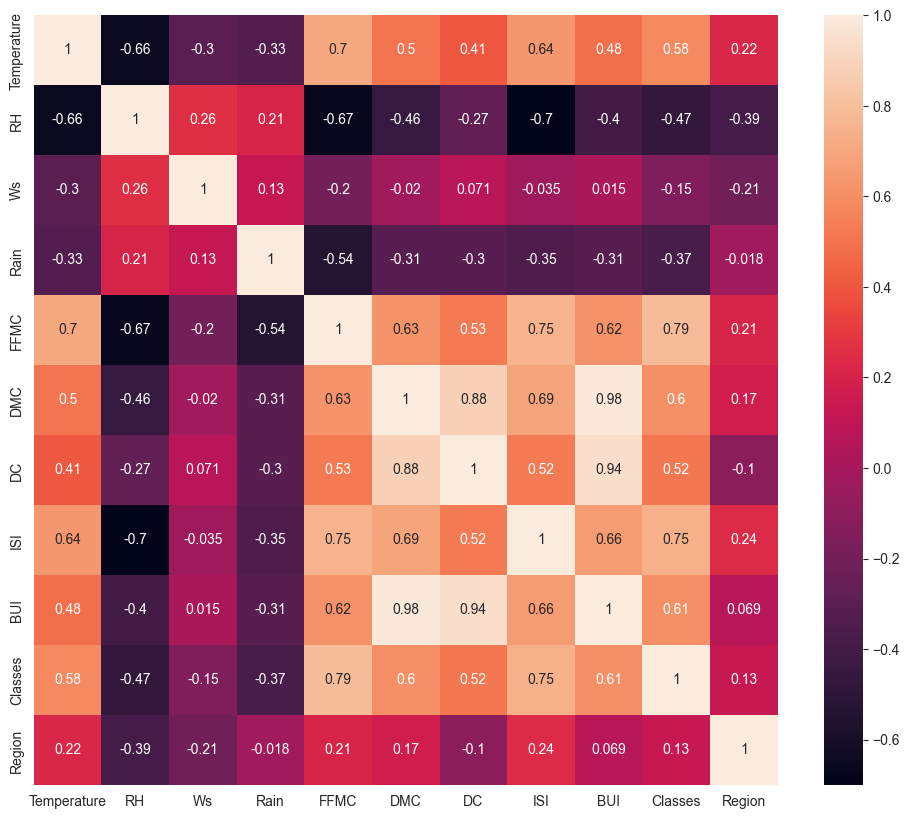

In [448]:
# check for multicolinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [449]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657865,-0.301657,-0.332138,0.701348,0.503208,0.408613,0.639462,0.483535,0.584496,0.222049
RH,-0.657865,1.000000,0.261967,0.208189,-0.673816,-0.456503,-0.272701,-0.700621,-0.404756,-0.473400,-0.390660
Ws,-0.301657,0.261967,1.000000,0.129322,-0.197204,-0.020422,0.070561,-0.034900,0.014725,-0.151298,-0.205506
Rain,-0.332138,0.208189,0.129322,1.000000,-0.535442,-0.306489,-0.302147,-0.350055,-0.314603,-0.372828,-0.018347
FFMC,0.701348,-0.673816,-0.197204,-0.535442,1.000000,0.625581,0.526389,0.753440,0.615137,0.789954,0.213642
DMC,0.503208,-0.456503,-0.020422,-0.306489,0.625581,1.000000,0.882059,0.690784,0.982800,0.602433,0.173932
DC,0.408613,-0.272701,0.070561,-0.302147,0.526389,0.882059,1.000000,0.522379,0.943256,0.520841,-0.100300
ISI,0.639462,-0.700621,-0.034900,-0.350055,0.753440,0.690784,0.522379,1.000000,0.659108,0.747281,0.237569
BUI,0.483535,-0.404756,0.014725,-0.314603,0.615137,0.982800,0.943256,0.659108,1.000000,0.605531,0.068821
Classes,0.584496,-0.473400,-0.151298,-0.372828,0.789954,0.602433,0.520841,0.747281,0.605531,1.000000,0.134060


In [450]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=df_copy.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr             

In [454]:
 ## threshold - domain expertise

corr_feature=correlation(x_train,0.85)

In [456]:
corr_feature

{'BUI', 'DC', 'FWI'}

In [458]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
42,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,0,0
55,36,53,19,0.0,89.2,17.1,98.6,10.0,23.9,1,0
153,33,48,16,0.0,87.6,7.9,17.8,6.8,7.8,1,1
156,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,1,1
123,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...
104,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0,0
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
236,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0,1
216,30,66,15,0.2,73.5,4.1,26.6,1.5,6.0,0,1


In [460]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
110,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,1,0
212,30,59,19,0.0,89.1,27.8,168.2,9.8,39.3,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
20,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,1,0
81,36,58,19,0.0,88.6,29.6,141.1,9.2,38.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...
80,35,68,19,0.0,88.3,25.9,130.6,8.8,34.7,1,0
226,28,81,15,0.0,84.6,12.6,41.5,4.3,14.3,1,1
140,32,67,14,4.5,64.6,4.4,8.2,1.0,4.2,0,1
163,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,1,1


In [462]:
x_train.drop(corr_feature, axis=1, inplace=True, errors='ignore')
x_test.drop(corr_feature, axis=1, inplace=True, errors='ignore')
x_train.shape,x_test.shape

((162, 9), (81, 9))

## Feature Scaling Or Standardization

In [465]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [467]:
x_train_scaled

array([[-0.83851868, -0.33829613, -0.55353588, ...,  0.66859115,
         0.90566259, -1.02500386],
       [-0.5673809 , -0.20413708,  1.21167698, ...,  1.12435284,
         0.90566259,  0.97560608],
       [-1.10965646,  1.67408966, -0.20049331, ..., -1.08609137,
        -1.10416397,  0.97560608],
       ...,
       [-0.02510535,  0.33249913, -0.55353588, ..., -0.88099861,
        -1.10416397,  0.97560608],
       [ 1.05944576, -1.21032997, -0.90657846, ...,  0.78253157,
         0.90566259,  0.97560608],
       [ 2.14399686, -2.08236381, -0.20049331, ...,  2.6739426 ,
         0.90566259,  0.97560608]])

## box Plot To understand Effects Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

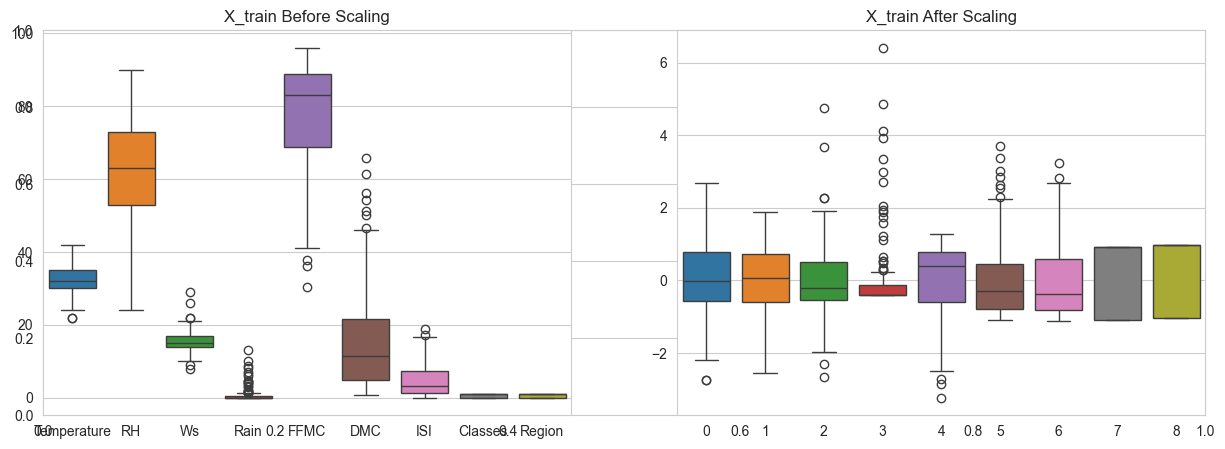

In [470]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train After Scaling')

## Linear Regressoion model

In [472]:
## have jyare jarur pade atle aapde aa file ne import kari aapde aa model ne use kari skiye chiye
import pickle
model_regressor=pickle.load(open('regressor.pkl', 'rb'))
model_regressor.fit(x_train_scaled,y_train)
y_pred=model_regressor.predict(x_test_scaled)

## Performance metrix cost function
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error:-",mae)
print("R2 Score:-",score)


Mean Absolute error:- 0.6015622378073724
R2 Score:- 0.9769244555592392


## Lasso Regression

In [476]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.04554950708274
R2 Score 0.9522570121819448


## Ridge Regression

In [479]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6137591862152532
R2 Score 0.9764301280916386


## Elastic Regression

In [482]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.6595675441861162
R2 Score 0.88598699518303


In [484]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb')) ## aapde dump kaariye chiye scaler model ne into dcaler.pkl atle open lakhyu ke aa fiile ma karo and wb atle write byte mode
pickle.dump(ridge, open('ridge.pkl', 'wb')) 